# Microsoft Stock Prediction Using LSTM, STACKED LSTM and BiDirectional LSTM


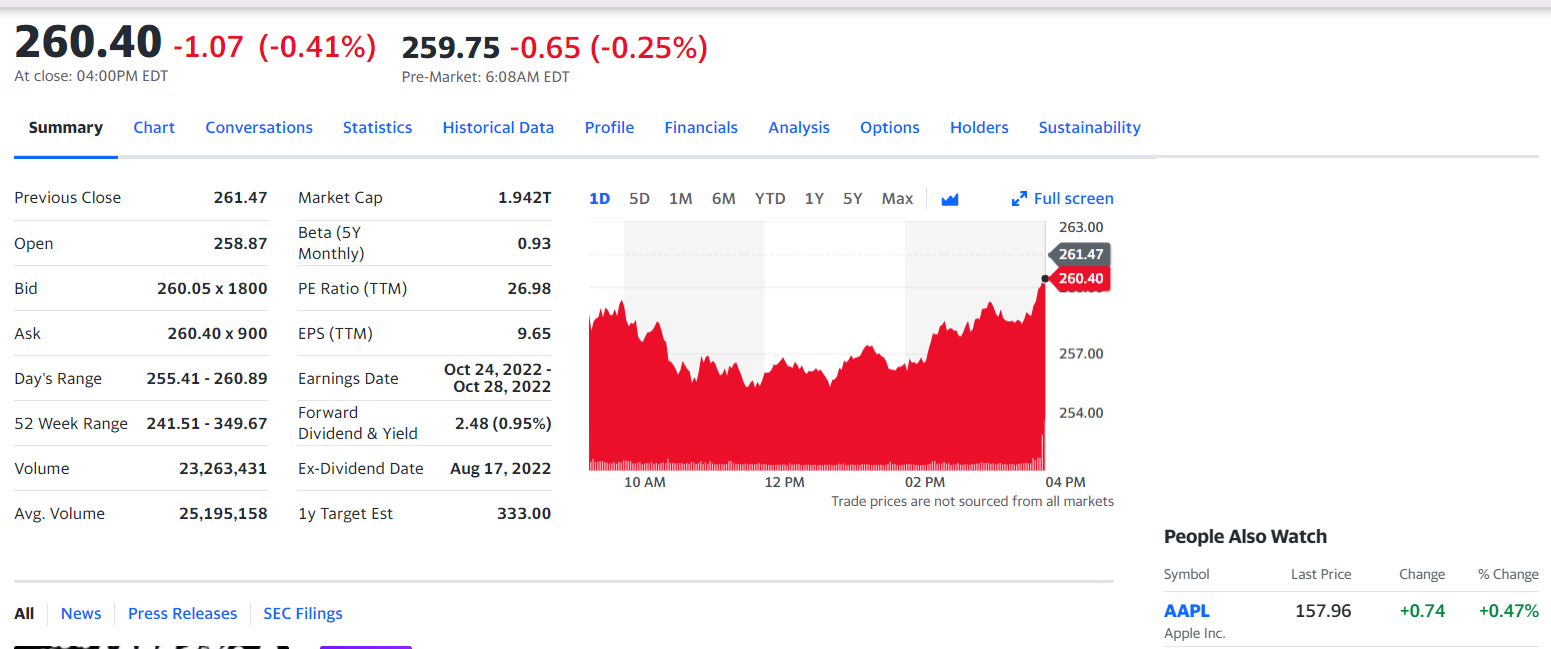

Microsoft Corporation is an American multinational technology corporation which produces computer software, consumer electronics, personal computers, and related services.

In this project we are going to apply deep learning models on the dataset of Microft stocks, which we have beend downloaded from Yahoo Finance Website. Then we will aply Data Analysis on it to visualize it. After that we will be computing its autocorrelation, mean, standard daviation. Before applying deep learning techniques on it. We will check its stationarity by using AdFuller method as we learned in the previous sections. In final step, we will aplly LSTM, Stacked LSTM and BiLSTM Models to compare their performance on the given dataset.

So lets start our project by importing libraries.

# Import Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Load Dataset

In [2]:
df= pd.read_csv('MSFT.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,1/3/2017,62.790001,62.840000,62.130001,62.580002,57.807823,20694100
1,1/4/2017,62.480000,62.750000,62.119999,62.299999,57.549179,21340000
2,1/5/2017,62.189999,62.660000,62.029999,62.299999,57.549179,24876000
3,1/6/2017,62.299999,63.150002,62.040001,62.840000,58.047993,19922900
4,1/9/2017,62.759998,63.080002,62.540001,62.639999,57.863243,20382700


In [4]:
df.tail()

,Date,Open,High,Low,Close,Adj_Close,Volume
1421,8/25/2022,277.329987,279.019989,274.519989,278.850006,278.850006,16583400
1422,8/26/2022,279.079987,280.339996,267.980011,268.089996,268.089996,27532500
1423,8/29/2022,265.850006,267.399994,263.850006,265.230011,265.230011,20338500
1424,8/30/2022,266.670013,267.049988,260.660004,262.970001,262.970001,22767100
1425,8/31/2022,265.390015,267.109985,261.329987,261.470001,261.470001,24728900


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426 entries, 0 to 1425
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1426 non-null   object 
 1   Open       1426 non-null   float64
 2   High       1426 non-null   float64
 3   Low        1426 non-null   float64
 4   Close      1426 non-null   float64
 5   Adj_Close  1426 non-null   float64
 6   Volume     1426 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 78.1+ KB


# Compute Mean, STD, Min and Max Values

In [7]:
df.describe()
# 25% data is less thn 903

,Open,High,Low,Close,Adj_Close,Volume
count,1426.000000,1426.000000,1426.000000,1426.000000,1426.000000,1.426000e+03
mean,169.561353,171.243268,167.753464,169.588822,165.923293,2.890647e+07
std,82.510456,83.402749,81.533050,82.509972,83.539829,1.262903e+07
min,62.189999,62.660000,61.950001,62.299999,57.549179,7.425600e+06
25%,98.414999,99.912503,97.302502,98.444999,93.971957,2.075820e+07
50%,142.135002,144.700005,139.805001,141.455002,137.402313,2.568230e+07
75%,243.832501,245.525005,241.487496,243.752502,240.720517,3.318965e+07
max,344.619995,349.670013,342.200012,343.109985,340.882782,1.112421e+08


In [8]:
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume'], dtype='object')

In [9]:
df.shape

(1426, 7)

In [10]:
df.isnull().any()

Date         False
Open         False
High         False
Low          False
Close        False
Adj_Close    False
Volume       False
dtype: bool

In [11]:
df

,Date,Open,High,Low,Close,Adj_Close,Volume
0,1/3/2017,62.790001,62.840000,62.130001,62.580002,57.807823,20694100
1,1/4/2017,62.480000,62.750000,62.119999,62.299999,57.549179,21340000
2,1/5/2017,62.189999,62.660000,62.029999,62.299999,57.549179,24876000
3,1/6/2017,62.299999,63.150002,62.040001,62.840000,58.047993,19922900
4,1/9/2017,62.759998,63.080002,62.540001,62.639999,57.863243,20382700
...,...,...,...,...,...,...,...
1421,8/25/2022,277.329987,279.019989,274.519989,278.850006,278.850006,16583400
1422,8/26/2022,279.079987,280.339996,267.980011,268.089996,268.089996,27532500
1423,8/29/2022,265.850006,267.399994,263.850006,265.230011,265.230011,20338500
1424,8/30/2022,266.670013,267.049988,260.660004,262.970001,262.970001,22767100


In [12]:
df.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,1/3/2017,62.790001,62.840000,62.130001,62.580002,57.807823,20694100
1,1/4/2017,62.480000,62.750000,62.119999,62.299999,57.549179,21340000
2,1/5/2017,62.189999,62.660000,62.029999,62.299999,57.549179,24876000
3,1/6/2017,62.299999,63.150002,62.040001,62.840000,58.047993,19922900
4,1/9/2017,62.759998,63.080002,62.540001,62.639999,57.863243,20382700


In [13]:
df.isnull()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1421,False,False,False,False,False,False,False
1422,False,False,False,False,False,False,False
1423,False,False,False,False,False,False,False
1424,False,False,False,False,False,False,False


# Visualize the overall trend of the Dataset

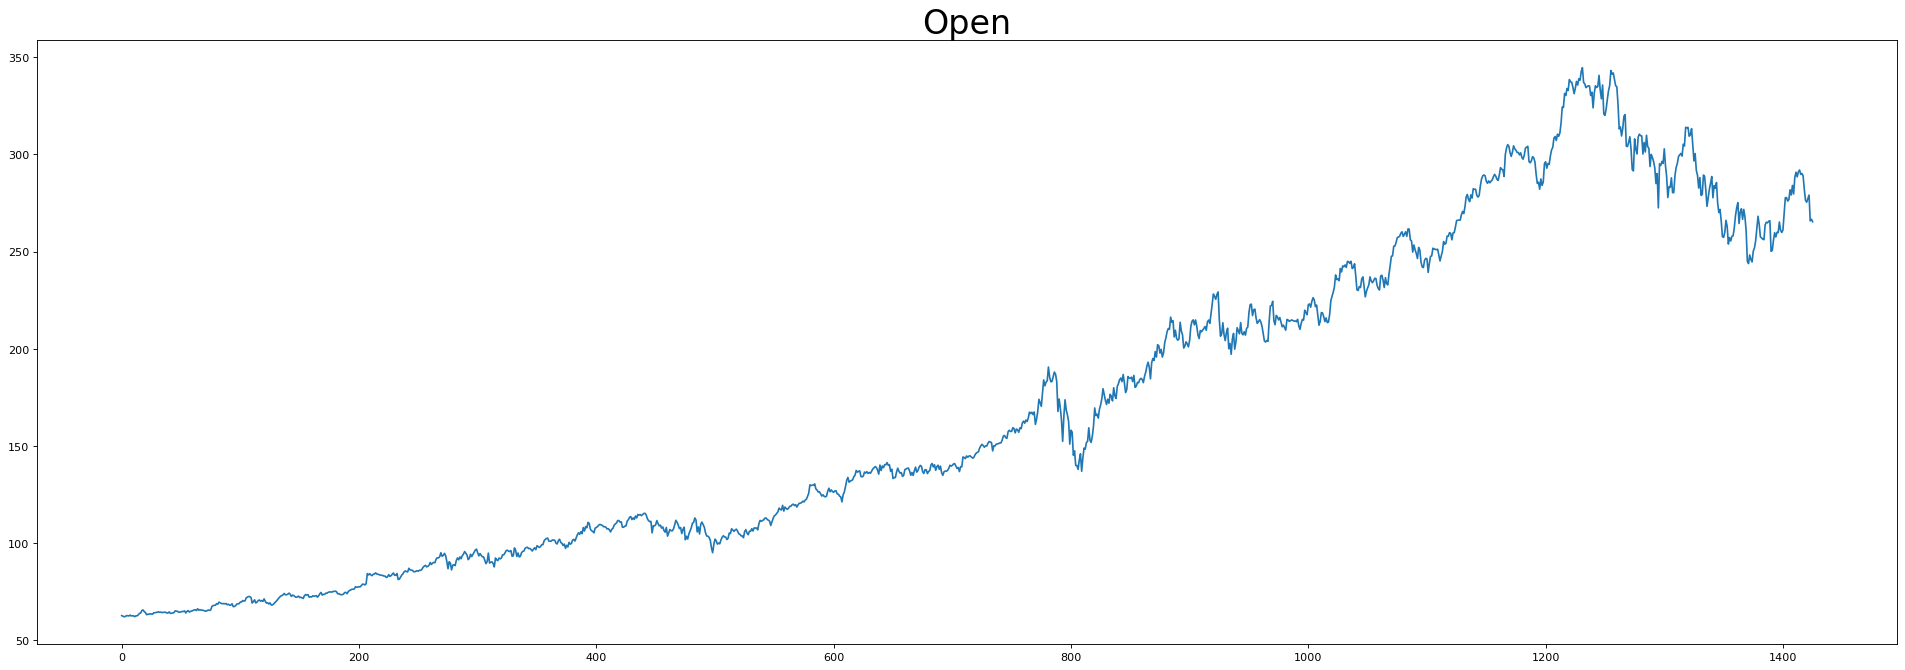

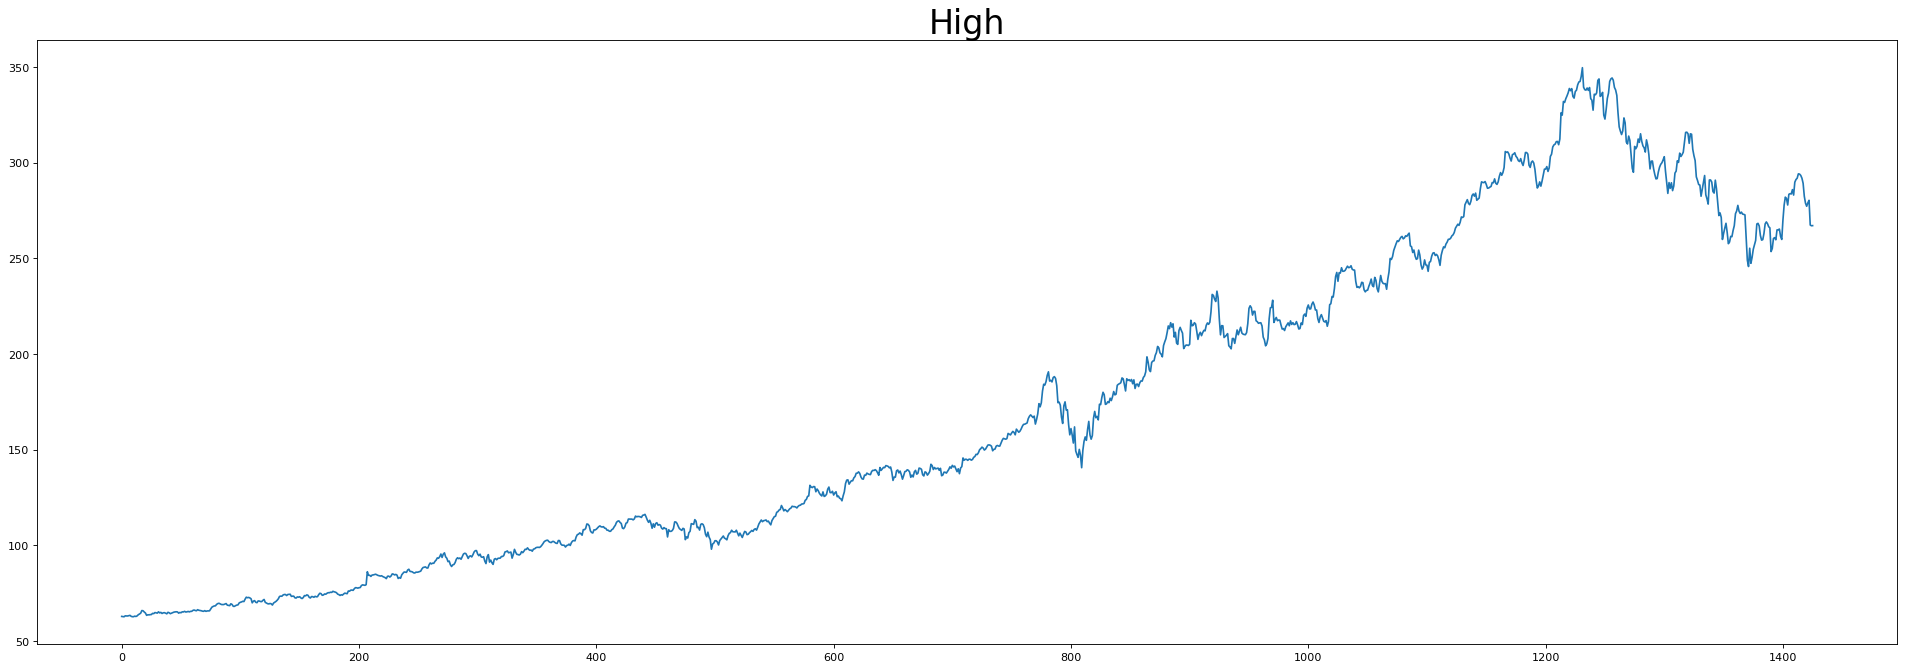

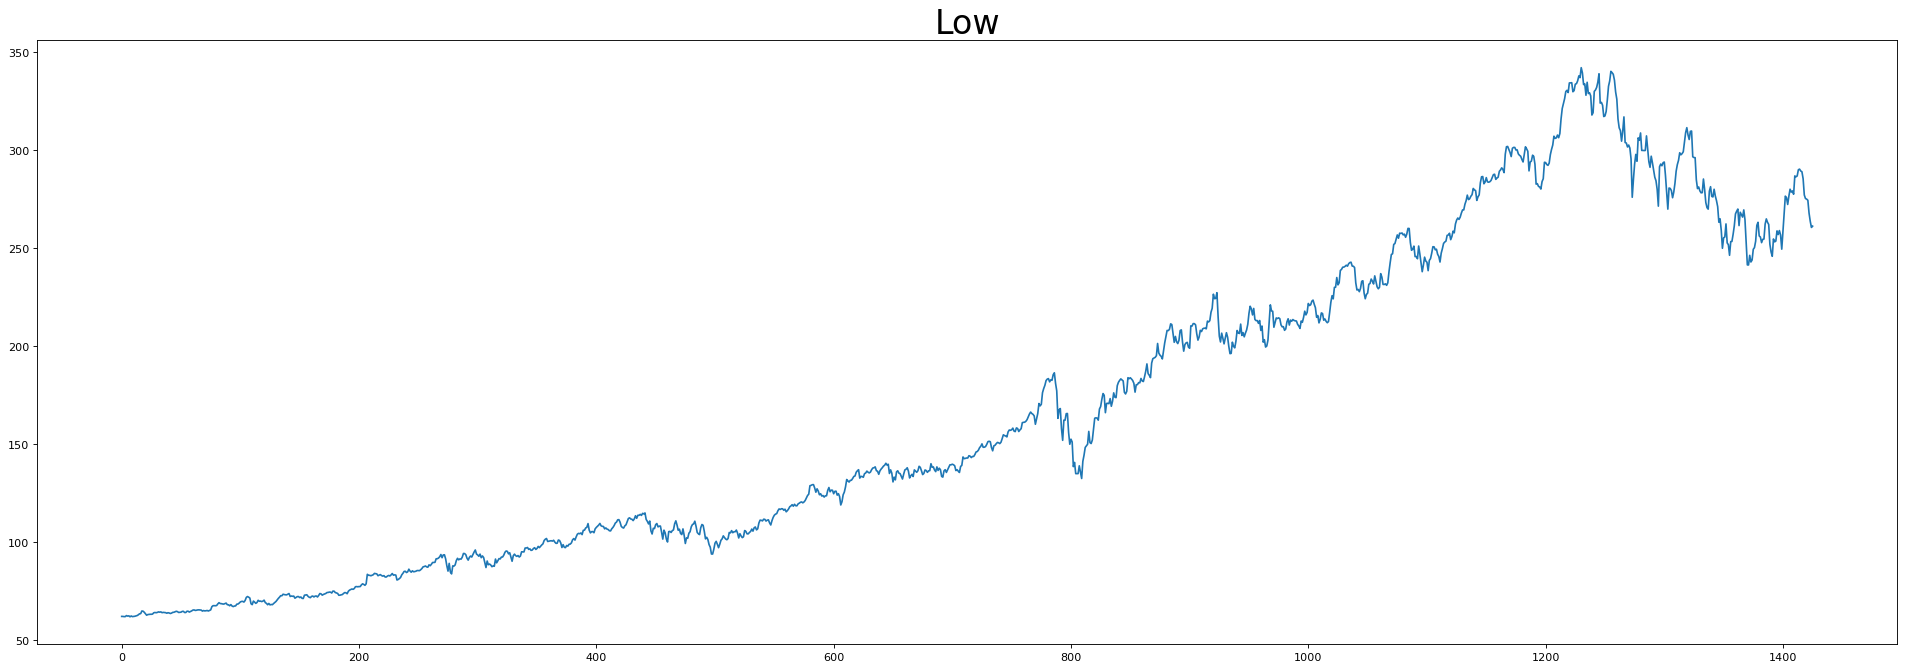

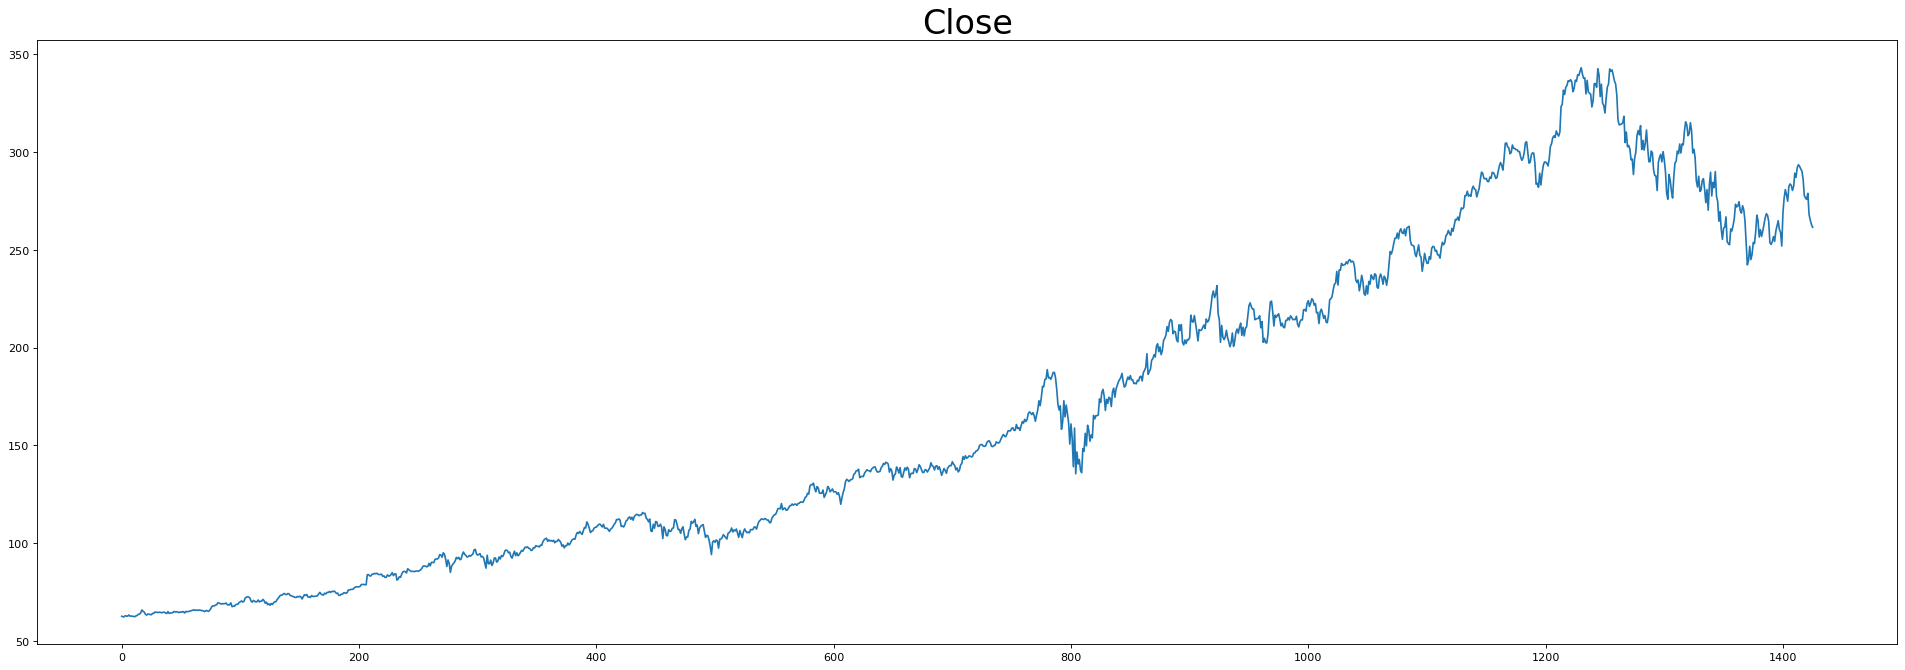

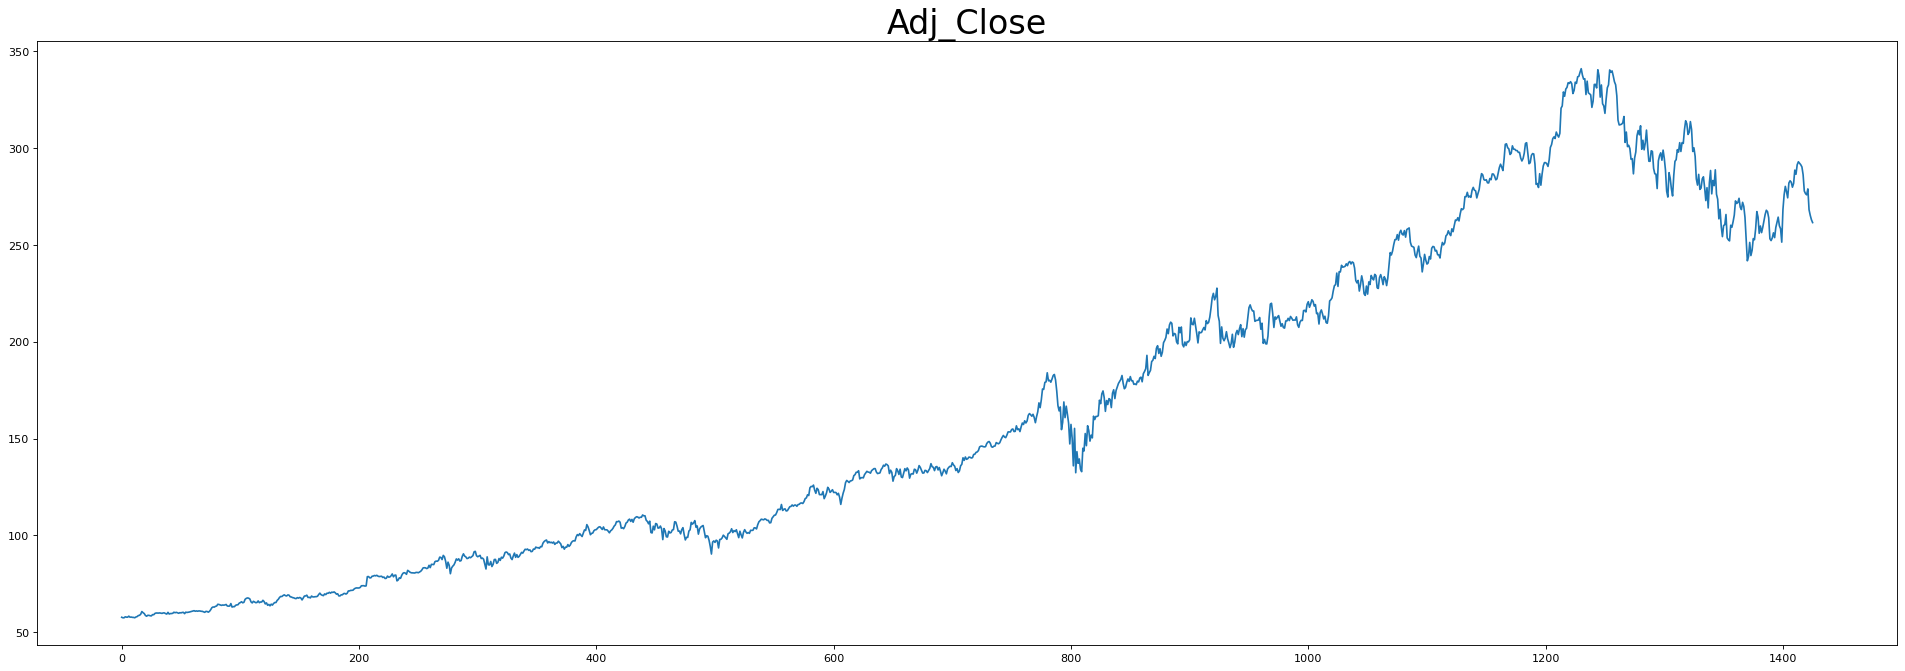

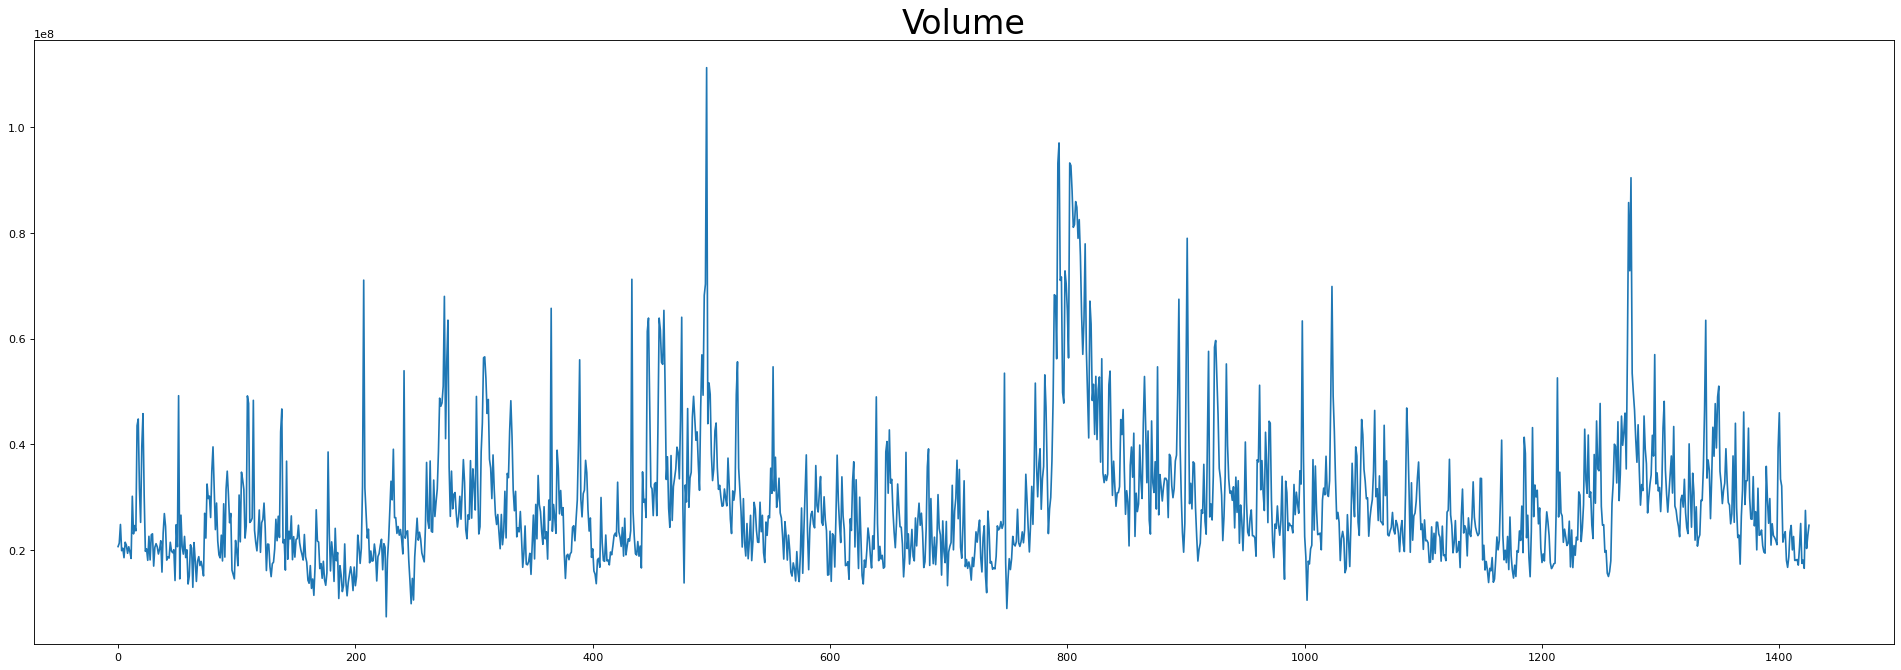

In [14]:
plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('Open', fontsize=30)
plt.plot(df.Open)

plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('High', fontsize=30)
plt.plot(df.High)

plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('Low', fontsize=30)
plt.plot(df.Low)

plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('Close', fontsize=30)
plt.plot(df.Close)

plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('Adj_Close', fontsize=30)
plt.plot(df.Adj_Close)

plt.figure(num=None, figsize=(30, 10), dpi=80, facecolor='w', edgecolor='k')
plt.title('Volume', fontsize=30)
plt.plot(df.Volume)

# Line Plot

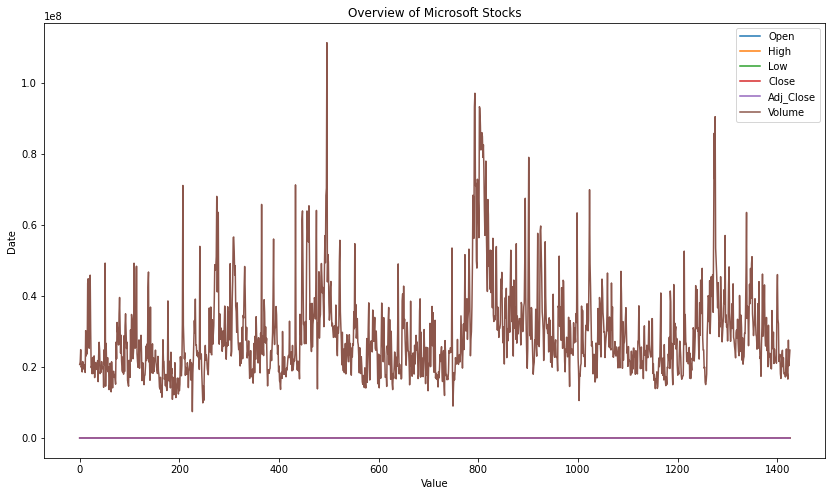

In [15]:
df.plot(kind='line',figsize=(14, 8))

plt.title('Overview of Microsoft Stocks')
plt.ylabel('Date')
plt.xlabel('Value')
plt.show()

# Area Plot

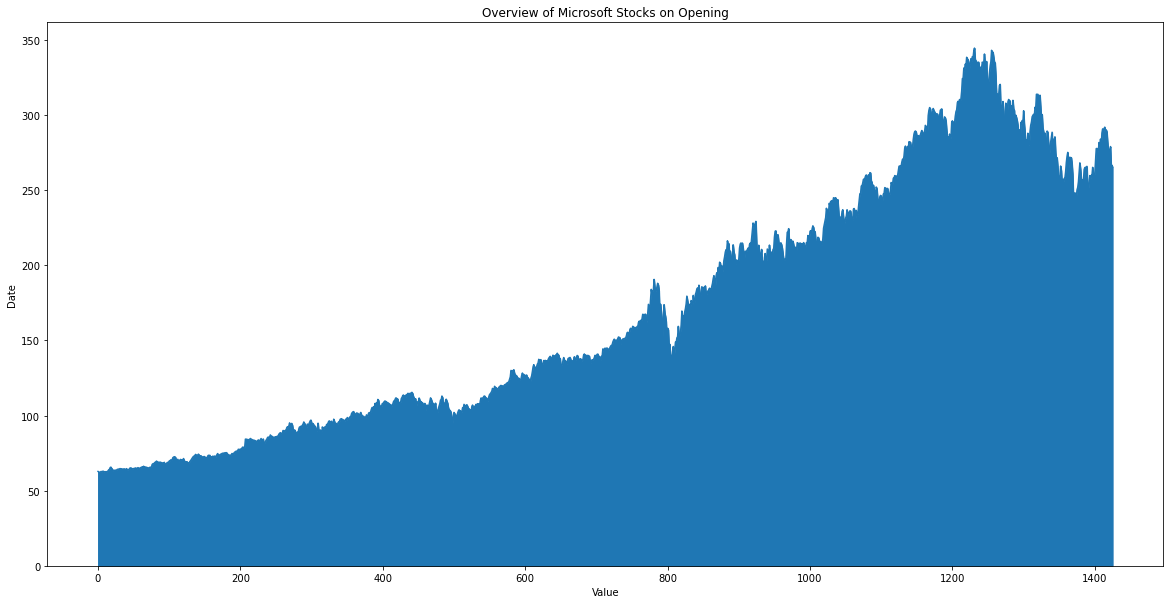

In [16]:
df['Open'].plot(kind='area',
             stacked=True,
             figsize=(20, 10))  # pass a tuple (x, y) size

plt.title('Overview of Microsoft Stocks on Opening')
plt.ylabel('Date')
plt.xlabel('Value')

plt.show()

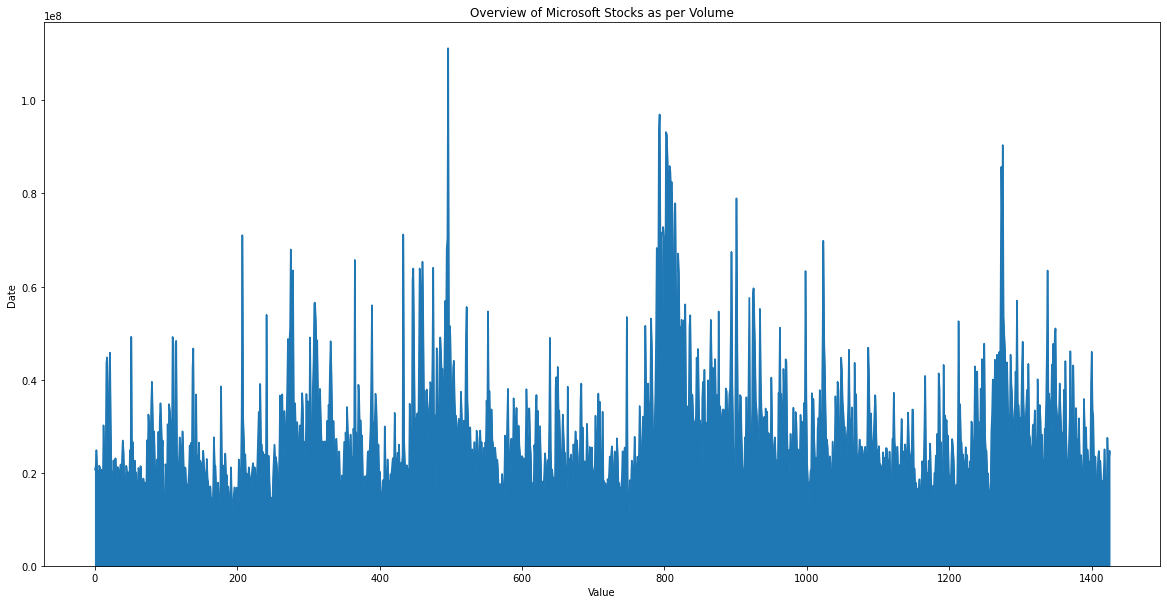

In [18]:
df['Volume'].plot(kind='area',
             stacked=True,
             figsize=(20, 10))  # pass a tuple (x, y) size

plt.title('Overview of Microsoft Stocks as per Volume')
plt.ylabel('Date')
plt.xlabel('Value')

plt.show()

# Visualize Correlation, STD and Mean

In [19]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
#Plots lags on the horizontal and the correlations on vertical axis.
#Plot the partial autocorrelation function
#we will use plot_pcaf later 


Text(0.5, 1.0, 'Mean over time')

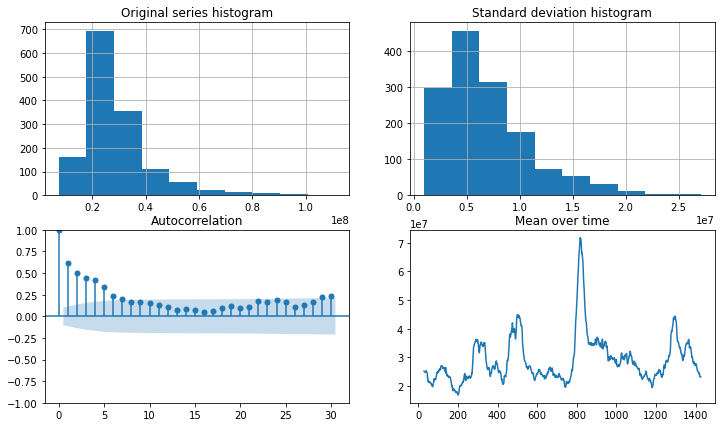

In [20]:
fig = plt.figure(figsize=(12, 7)) #ajust figure parameter
layout = (2, 2)
hist_ax = plt.subplot2grid(layout, (0, 0)) #obtain four diagrams 
ac_ax = plt.subplot2grid(layout, (1, 0))
hist_std_ax = plt.subplot2grid(layout, (0, 1))
mean_ax = plt.subplot2grid(layout, (1, 1))

df.Volume.hist(ax=hist_ax) #draw histogram of pollution_today
hist_ax.set_title("Original series histogram")

series = df.Volume[:365]

plot_acf(series, lags=30, ax=ac_ax) #plot the autocorrelation
ac_ax.set_title("Autocorrelation")

mm = df.Volume.rolling(7).std() #plot hisogram of std of pollution_today
mm.hist(ax=hist_std_ax)
hist_std_ax.set_title("Standard deviation histogram")

mm = df.Volume.rolling(30).mean() #plot the mean of pollution_today with step size 30
mm.plot(ax=mean_ax)
mean_ax.set_title("Mean over time")

# Check Stationarity

In [21]:
from statsmodels.tsa.stattools import adfuller
#builtin library for stats model
# The Augmented Dickey-Fuller test can be used to test for a unit root in a univariate process in the 
#presence of serial correlation.

In [22]:
X = df.Volume.values #get the list of all the values present in pollution_today
result = adfuller(X) #apply Augmented Dicky-Fuller test
print('ADF Statistic: %f' % result[0]) #print the result of adfuller method
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -5.557343
p-value: 0.000002
Critical Values:
	1%: -3.435
	5%: -2.864
	10%: -2.568


# 1. Volume Forecasting using LSTM Model

In [23]:
#Separate dates for future plotting
train_dates = pd.to_datetime(df['Date'])
train_dates

0      2017-01-03
1      2017-01-04
2      2017-01-05
3      2017-01-06
4      2017-01-09
          ...    
1421   2022-08-25
1422   2022-08-26
1423   2022-08-29
1424   2022-08-30
1425   2022-08-31
Name: Date, Length: 1426, dtype: datetime64[ns]

In [24]:
cols = list(df)[6:7] #we are  taking last column
cols

['Volume']

In [25]:
df_for_training = df[cols].astype(float)
df_for_training

,Volume
0,20694100.0
1,21340000.0
2,24876000.0
3,19922900.0
4,20382700.0
...,...
1421,16583400.0
1422,27532500.0
1423,20338500.0
1424,22767100.0


<AxesSubplot:>

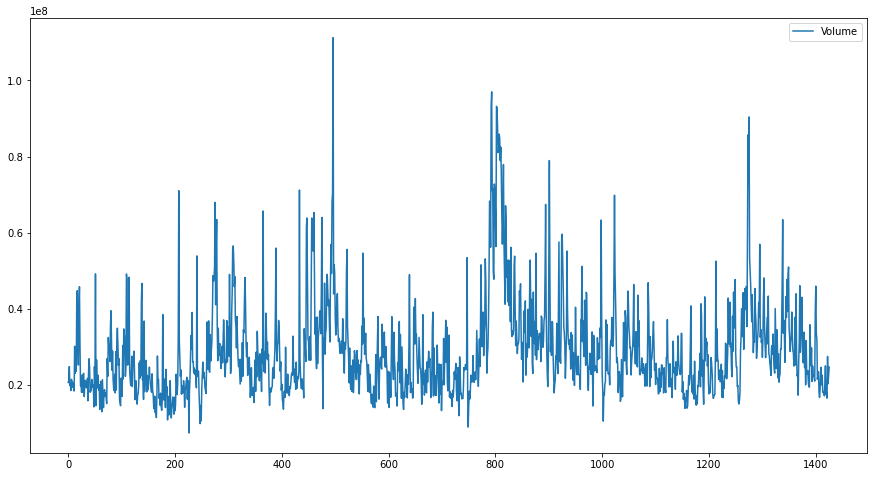

In [26]:
df_for_plot=df_for_training
df_for_plot.plot.line(figsize=(15,8))

In [27]:
#LSTM uses sigmoid and tanh that are sensitive to magnitude so values need to be normalized
# normalize the dataset
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
scaler =scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

df_for_training_scaled

array([[-0.65050546],
       [-0.59934343],
       [-0.31925529],
       ...,
       [-0.6786727 ],
       [-0.4863022 ],
       [-0.33090715]])

In [28]:
df_for_training.shape[1]

1

In [29]:
trainX=[]
trainY=[]

n_future = 1
n_past = 25

for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 0])
    
trainX, trainY =np.array(trainX), np.array(trainY)

print('trainX shape==={}.'.format(trainX.shape))
print('trainY shape==={}.'.format(trainY.shape))

trainX shape===(1401, 25, 1).
trainY shape===(1401, 1).


In [30]:
from keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Activation, Dropout, Bidirectional, BatchNormalization, Embedding

In [31]:
model = Sequential()

model.add(LSTM(32, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2])))

# # model.add(LSTM(32, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
# # model.add(LSTM(32, activation='relu'))


# model.add(Bidirectional(LSTM(32), input_shape=(trainX.shape[1], trainX.shape[2])))


# # model.add(Bidirectional(LSTM(32, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
# # model.add(Bidirectional(LSTM(32, activation='relu')))


# model.add(Dropout(0.2))
# model.add(Dense(trainY.shape[1]))


model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                4352      
                                                                 
Total params: 4,352
Trainable params: 4,352
Non-trainable params: 0
_________________________________________________________________


In [32]:
# fit the model
history = model.fit(trainX, trainY, epochs=62, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/62
79/79 [==============================] - 6s 33ms/step - loss: 1.0475 - val_loss: 0.4575
Epoch 2/62
79/79 [==============================] - 2s 24ms/step - loss: 0.9990 - val_loss: 0.4554
Epoch 3/62
79/79 [==============================] - 2s 26ms/step - loss: 1.5657 - val_loss: 0.4632
Epoch 4/62
79/79 [==============================] - 2s 29ms/step - loss: 1.0335 - val_loss: 0.4629
Epoch 5/62
79/79 [==============================] - 2s 23ms/step - loss: 1.0124 - val_loss: 0.4620
Epoch 6/62
79/79 [==============================] - 2s 23ms/step - loss: 0.9997 - val_loss: 0.4599
Epoch 7/62
79/79 [==============================] - 2s 23ms/step - loss: 0.9766 - val_loss: 0.4533
Epoch 8/62
79/79 [==============================] - 2s 22ms/step - loss: 0.9862 - val_loss: 0.4551
Epoch 9/62
79/79 [==============================] - 2s 25ms/step - loss: 0.9653 - val_loss: 0.4501
Epoch 10/62
79/79 [==============================] - 2s 26ms/step - loss: 0.9389 - val_loss: 0.4459
Epoch 11/

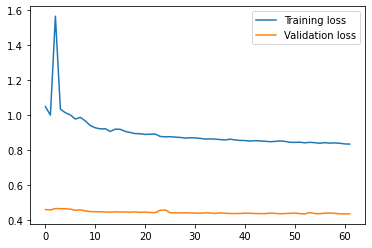

In [33]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [34]:
#Predicting...
#Libraries that will help us extract only business days in the US.
#Otherwise our dates would be wrong when we look back (or forward).  
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [35]:
n_past = 10
n_days_for_prediction=100  

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()

In [36]:
# make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction

4/4 [==============================] - 0s 10ms/step


In [37]:
#Perform inverse transformation to rescale back to original range
#Since we used 1 variables for transform, the inverse expects same dimensions
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
prediction_copies.shape

(100, 32)

In [38]:
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

In [39]:
# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Volume':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

C:\Users\Taimoor M Gondal\AppData\Local\Temp\ipykernel_11200\985923314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])
C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments 

<AxesSubplot:xlabel='Date', ylabel='Volume'>

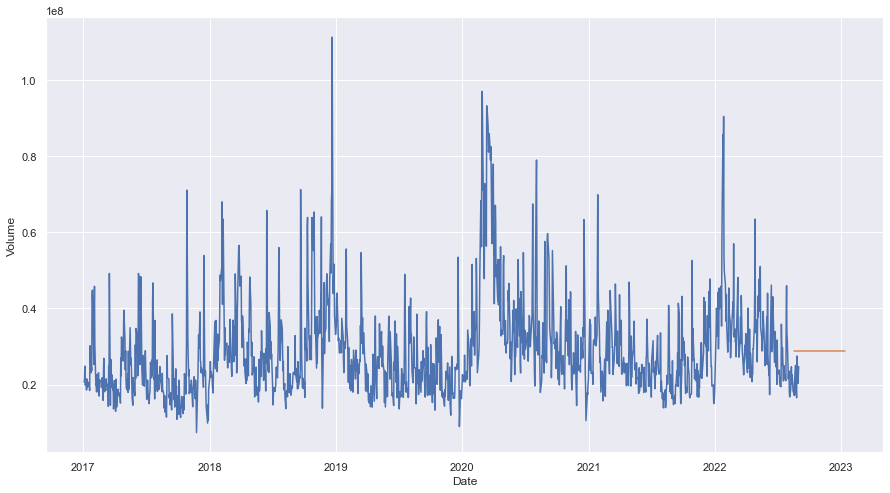

In [41]:

original = df[['Date', 'Volume']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2017-1-3']
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(original['Date'], original['Volume'])
sns.lineplot(df_forecast['Date'], df_forecast['Volume'])

# 2- Volume Forecasting Using Stacked LSTM Model

In [42]:
model = Sequential()


model.add(LSTM(32, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True))
model.add(LSTM(32, activation='relu'))


model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 25, 32)            4352      
                                                                 
 lstm_2 (LSTM)               (None, 32)                8320      
                                                                 
Total params: 12,672
Trainable params: 12,672
Non-trainable params: 0
_________________________________________________________________


In [43]:
# fit the model
history = model.fit(trainX, trainY, epochs=62, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/62
79/79 [==============================] - 11s 52ms/step - loss: 1.0166 - val_loss: 0.4475
Epoch 2/62
79/79 [==============================] - 3s 37ms/step - loss: 0.9905 - val_loss: 0.4439
Epoch 3/62
79/79 [==============================] - 3s 40ms/step - loss: 0.9448 - val_loss: 0.4382
Epoch 4/62
79/79 [==============================] - 3s 44ms/step - loss: 0.9257 - val_loss: 0.4442
Epoch 5/62
79/79 [==============================] - 3s 34ms/step - loss: 0.9380 - val_loss: 0.4499
Epoch 6/62
79/79 [==============================] - 3s 37ms/step - loss: 0.9070 - val_loss: 0.4427
Epoch 7/62
79/79 [==============================] - 3s 36ms/step - loss: 0.8647 - val_loss: 0.4437
Epoch 8/62
79/79 [==============================] - 3s 37ms/step - loss: 0.8416 - val_loss: 0.4339
Epoch 9/62
79/79 [==============================] - 3s 33ms/step - loss: 0.8098 - val_loss: 0.4303
Epoch 10/62
79/79 [==============================] - 3s 33ms/step - loss: 0.8030 - val_loss: 0.4234
Epoch 11

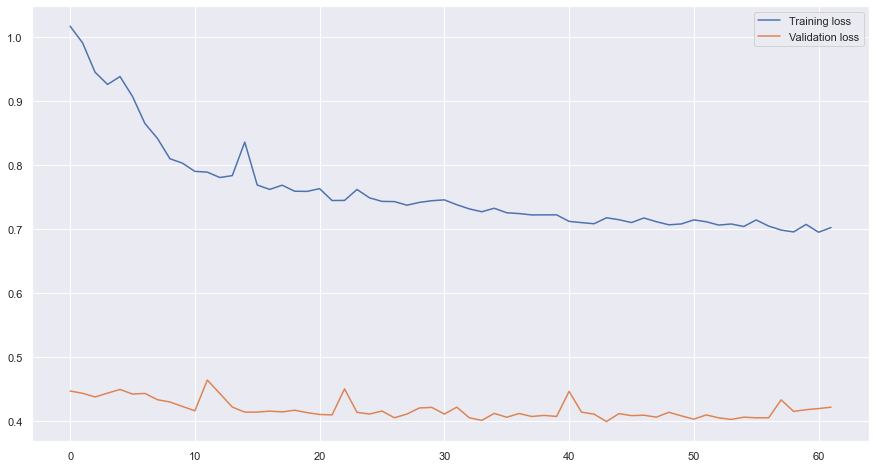

In [44]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [45]:
#Predicting...
#Libraries that will help us extract only business days in the US.
#Otherwise our dates would be wrong when we look back (or forward).  
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [46]:
n_past = 10
n_days_for_prediction=100  

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()

In [47]:
# make prediction
prediction = model.predict(trainX[-n_days_for_prediction:]) #shape = (n, 1) where n is the n_days_for_prediction
prediction

4/4 [==============================] - 1s 14ms/step


array([[8.5192889e-02, 1.7941529e-01, 8.7944493e-02, ..., 1.3377999e-01,
        1.3947645e-01, 1.3824968e-01],
       [8.2736099e-03, 4.9051955e-02, 2.2922248e-02, ..., 3.7445996e-02,
        4.0254113e-03, 3.0755615e-02],
       [2.0977677e-01, 2.0958006e-01, 2.1615407e-01, ..., 2.1885175e-01,
        3.1747794e-01, 2.2699076e-01],
       ...,
       [5.3684534e-23, 8.3036477e-21, 1.1501962e-13, ..., 2.5022893e-28,
        4.6447844e-25, 8.0372966e-15],
       [3.7881127e-20, 1.5933040e-17, 5.5586091e-12, ..., 5.4937851e-24,
        2.5618216e-22, 2.4123700e-12],
       [2.6953668e-22, 6.7728870e-20, 2.2606826e-13, ..., 5.1579728e-27,
        2.0451245e-24, 5.5654296e-14]], dtype=float32)

In [48]:
#Perform inverse transformation to rescale back to original range
#Since we used 1 variables for transform, the inverse expects same dimensions
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
prediction_copies.shape

(100, 32)

In [49]:
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

In [50]:
# Convert timestamp to date
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Volume':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

C:\Users\Taimoor M Gondal\AppData\Local\Temp\ipykernel_11200\1607388780.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])
C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments

<AxesSubplot:xlabel='Date', ylabel='Volume'>

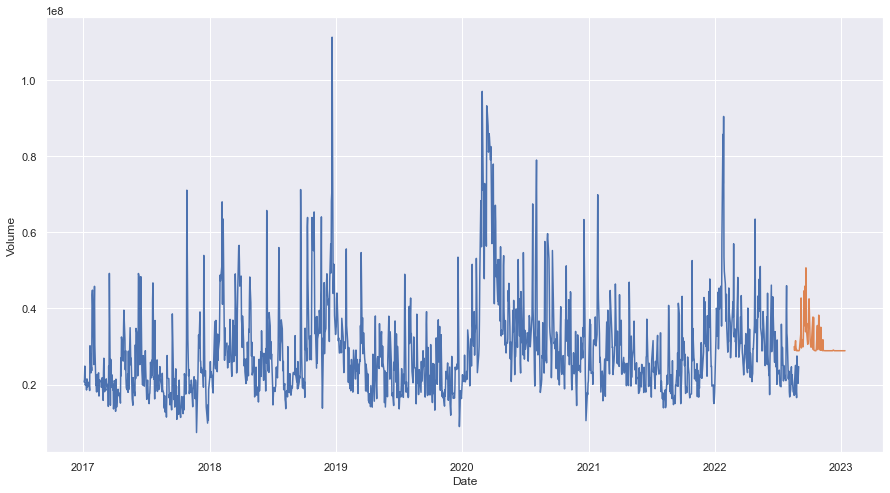

In [51]:
original = df[['Date', 'Volume']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2017-1-3']

sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(original['Date'], original['Volume'])
sns.lineplot(df_forecast['Date'], df_forecast['Volume'])

# 3-BiLSTM

In [52]:
model = Sequential()

model.add(Bidirectional(LSTM(32,return_sequences=True),input_shape=(trainX.shape[1], trainX.shape[2])))
model.add(Dropout(0.2))

model.add(Bidirectional(LSTM(32)))
model.add(Dropout(0.2))

model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 25, 64)           8704      
 l)                                                              
                                                                 
 dropout (Dropout)           (None, 25, 64)            0         
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 33,601
Trainable params: 33,601
Non-trai

In [53]:
history= model.fit(trainX,trainY, epochs=62, batch_size=16, validation_split=0.1, verbose=1)

Epoch 1/62
79/79 [==============================] - 24s 92ms/step - loss: 0.6434 - val_loss: 0.3389
Epoch 2/62
79/79 [==============================] - 4s 45ms/step - loss: 0.5450 - val_loss: 0.3422
Epoch 3/62
79/79 [==============================] - 4s 45ms/step - loss: 0.5361 - val_loss: 0.3352
Epoch 4/62
79/79 [==============================] - 4s 46ms/step - loss: 0.5202 - val_loss: 0.3338
Epoch 5/62
79/79 [==============================] - 4s 46ms/step - loss: 0.5131 - val_loss: 0.3282
Epoch 6/62
79/79 [==============================] - 4s 45ms/step - loss: 0.4785 - val_loss: 0.3320
Epoch 7/62
79/79 [==============================] - 4s 45ms/step - loss: 0.4875 - val_loss: 0.3235
Epoch 8/62
79/79 [==============================] - 4s 45ms/step - loss: 0.4811 - val_loss: 0.3292
Epoch 9/62
79/79 [==============================] - 3s 44ms/step - loss: 0.4761 - val_loss: 0.3156
Epoch 10/62
79/79 [==============================] - 4s 45ms/step - loss: 0.4795 - val_loss: 0.3133
Epoch 11

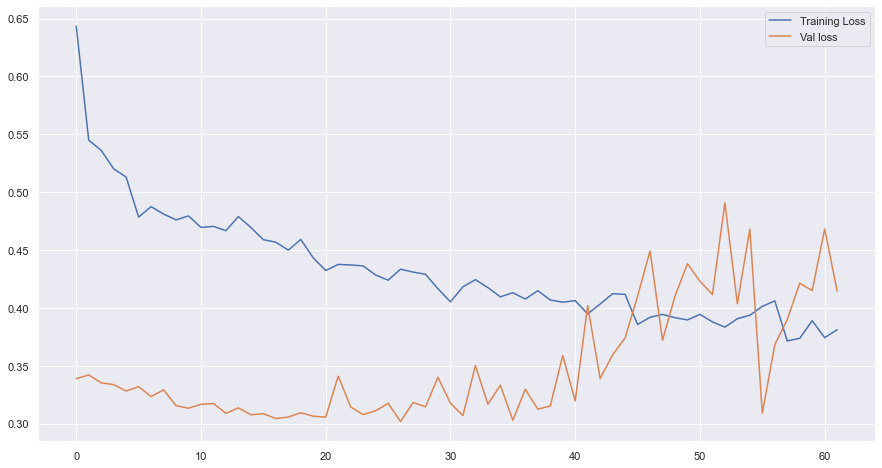

In [54]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Val loss')
plt.legend()

In [55]:
us_bd=CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [56]:
n_past = 10
n_days_for_prediction=100
predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq=us_bd).tolist()

In [57]:
prediction = model.predict(trainX[-n_days_for_prediction:])

4/4 [==============================] - 4s 25ms/step


In [58]:
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,0]

In [59]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'Volume':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

C:\Users\Taimoor M Gondal\AppData\Local\Temp\ipykernel_11200\1607388780.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])
C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Taimoor M Gondal\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments

<AxesSubplot:xlabel='Date', ylabel='Volume'>

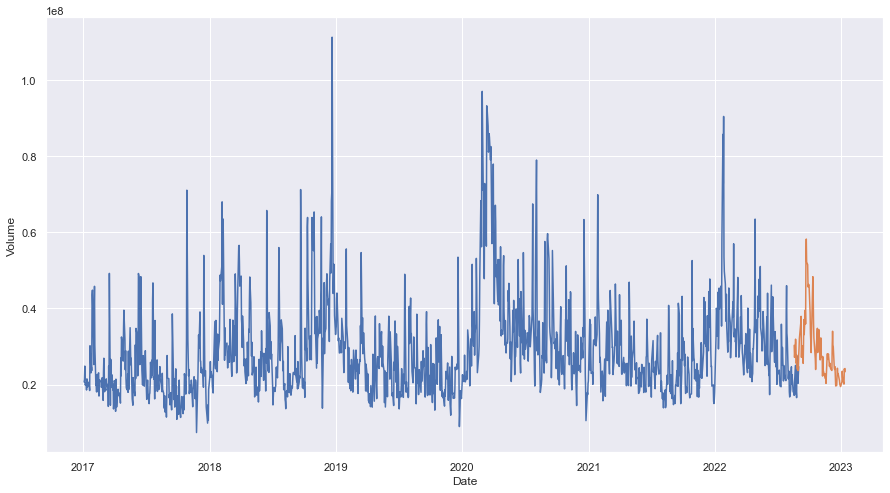

In [60]:
original = df[['Date', 'Volume']]
original['Date']=pd.to_datetime(original['Date'])
original = original.loc[original['Date'] >= '2017-1-3']

sns.set(rc = {'figure.figsize':(15,8)})
sns.lineplot(original['Date'], original['Volume'])
sns.lineplot(df_forecast['Date'], df_forecast['Volume'])